In [108]:
import numpy as np
param_max = 5 # Largest number of parameters

data = np.loadtxt('dataHw1.dat')
t = data[:,0].copy()
y = data[:,1].copy()
phi = np.stack([(t - 1)**n for n in range(0,param_max)], axis=1)
# print(y)
print(phi)

[[1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01]
 [1.0000e+00 3.0000e+00 9.0000e+00 2.7000e+01 8.1000e+01]
 [1.0000e+00 4.0000e+00 1.6000e+01 6.4000e+01 2.5600e+02]
 [1.0000e+00 5.0000e+00 2.5000e+01 1.2500e+02 6.2500e+02]
 [1.0000e+00 6.0000e+00 3.6000e+01 2.1600e+02 1.2960e+03]
 [1.0000e+00 7.0000e+00 4.9000e+01 3.4300e+02 2.4010e+03]
 [1.0000e+00 8.0000e+00 6.4000e+01 5.1200e+02 4.0960e+03]
 [1.0000e+00 9.0000e+00 8.1000e+01 7.2900e+02 6.5610e+03]
 [1.0000e+00 1.0000e+01 1.0000e+02 1.0000e+03 1.0000e+04]
 [1.0000e+00 1.1000e+01 1.2100e+02 1.3310e+03 1.4641e+04]
 [1.0000e+00 1.2000e+01 1.4400e+02 1.7280e+03 2.0736e+04]
 [1.0000e+00 1.3000e+01 1.6900e+02 2.1970e+03 2.8561e+04]
 [1.0000e+00 1.4000e+01 1.9600e+02 2.7440e+03 3.8416e+04]]


In [114]:
import pprint
import pandas as pd
from numpy.linalg import inv

theta_hat = []
loss = []
for i in range(0,param_max):
    phi_temp = phi[:, 0:i+1]
    theta_temp = inv(phi_temp.T@phi_temp)@phi_temp.T@y
    err = (y - phi_temp@theta_temp)
    theta_hat.append(np.append(theta_temp, [0]*(param_max - i - 1)))
    loss.append(err@err/2)
    
df = pd.DataFrame(np.vstack(theta_hat),
                  index=[i for i in range(1,param_max+1)],
                  columns=[f'Theta{i}' for i in range(1,param_max+1)])
df['Loss'] = loss
df

,Theta1,Theta2,Theta3,Theta4,Theta5,Loss
1,51.435013,0.000000,0.000000,0.000000,0.000000,24103.092840
2,-31.106229,11.791606,0.000000,0.000000,0.000000,4637.216740
3,11.150564,-7.711529,1.393081,0.000000,0.000000,634.251379
4,8.137128,-4.576673,0.813574,0.027596,0.000000,612.440363
5,4.234310,3.497340,-1.992023,0.346007,-0.011372,563.290183


Text(0, 0.5, 'y_hat')

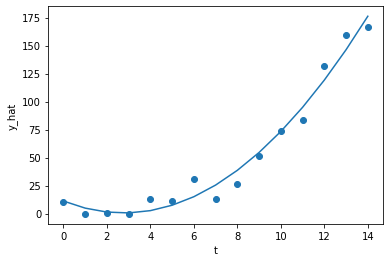

In [115]:
import matplotlib.pyplot as mpl
num_param_best = 3

theta_hat_true = df.loc[num_param_best, df.columns != 'Loss']
y_hat = phi@theta_hat_true

mpl.scatter((t - 1), y)
mpl.plot((t - 1), y_hat)
mpl.xlabel('t')
mpl.ylabel('y_hat')

In [118]:
num_param_best = 3
sigma = np.sqrt(2*df['Loss']/(np.array([15]*param_max) - df.index))
sigma

# sigma = 11
# phi_true = phi[:, 0:num_param_best]
# cov = pd.DataFrame((sigma**2)*inv(phi_true.T@phi_true), 
#                    index=[i for i in range(1,num_param_best+1)], 
#                    columns=[i for i in range(1,num_param_best+1)])
# pp.pprint(cov)

1    58.679630
2    26.709885
3    10.281467
4    10.552383
5    10.614049
dtype: float64

[12 12 12 12 12]
